In [1]:
import rushd as rd
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from textwrap import wrap
from statannotations.Annotator import Annotator

import warnings
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
experimentdir_WB =  rd.datadir/'western-blot'/'2025.04.10_Western-Blot_9SA.Ngn2'

outputdir = rd.rootdir/'figures'/'Ngn2_WB'

# Load Data

In [3]:
df = pd.read_csv(experimentdir_WB/'2025.04.10_WB_quantification.csv')
df['condition all'] = df['condition'] + '\n' + df['media'] + '\n' + df['phosphatase']

In [4]:
df = df.rename(columns={'Signal Intensity Relative to Actin (A.U.)': 'Signal Intensity\nRelative to Actin (A.U.)',
                           'Signal Intensity Rel. to WT-NIL (A.U.)':'Signal Intensity\nRel. to WT-NIL (A.U.)',
                            'Fold Change from WT to 9SA':'Fold Change\nRelative to WT'})

# Plotting Functions

In [13]:
def custom_catplot(xcat,ycat,dataslice,savetitle,hue=None,hue_order=None,height=4,width=8,xlabel_rot=0,xlabel='',
                   plottitle='',order=None,palette=None,pairs=None,color=None,log=False,s=70,hlines=None):
    aspect = width / height
    g = sns.catplot(x=xcat,y=ycat,data=dataslice,height=height,aspect=aspect,zorder=1,palette=palette,
                    order=order,hue=hue,hue_order=hue_order,color=color,s=s,dodge=True)
    # g.map_dataframe(sns.pointplot, x=xcat,y=ycat,errorbar='se',join=False,
    #                 capsize=0.22,ax=g.ax,palette=palette,markers='_',scale=1.5,errwidth=1.5,
    #                 order=order,hue=hue,hue_order=hue_order,color=color,dodge=0.4)
    ax = plt.gca()

    #plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))  # this is for if you want scientific y axis labels (e.g. 10^4 instead of 10000)
    if order != None:
        labels = [ '\n'.join(wrap(l, 6)) for l in order]
        #labels = [ '\n'.join(l.split(' ')) for l in order]
    else:
        labels = None

    if pairs != None:
        annotator = Annotator(g.ax,pairs,data=dataslice,x=xcat,y=ycat,order=order)
        annotator.configure(test='t-test-ind',text_format='star',loc='inside')
        annotator.apply_and_annotate()

    ymin, ymax = ax.get_ylim()
    if log == True:
        ax.set_yscale('log')
    elif ymax > 1000:
        plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

    if hlines is not None:
        for h in hlines:
            plt.axhline(y=h, color='#cccccc', linestyle='--',zorder=-1)
    
    #sns.move_legend(ax, "upper left", bbox_to_anchor=(0.93, 0.93), frameon=False)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
    sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
    plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.25) # make all plots have the same area
    g.set_xticklabels(labels,rotation=xlabel_rot, horizontalalignment='center' if xlabel_rot==0 else 'right')
    #g.tight_layout()
    plt.xlabel(xlabel)
    plt.ylabel(ycat)
    plt.title(plottitle)
    
    g.savefig(outputdir/str(savetitle + '.svg'),dpi=300)
    plt.show()



# WB Quantification, no p'ase

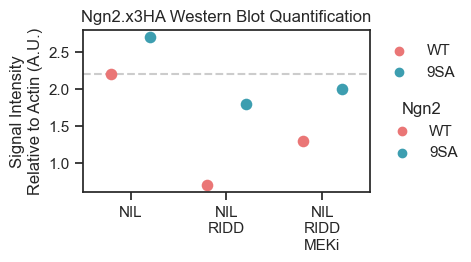

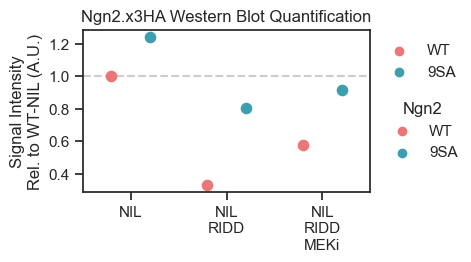

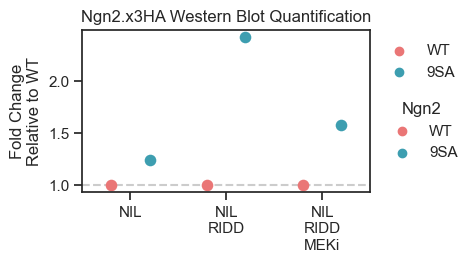

In [15]:
palette = {'WT':'#ea7676','9SA':'#3d9eb0'}

p = 'Ngn2.x3HA'

plottitle = p + ' Western Blot Quantification'
slice = df[df['Protein']==p] 

y2plot = ['Signal Intensity\nRelative to Actin (A.U.)',
          'Signal Intensity\nRel. to WT-NIL (A.U.)', 'Fold Change\nRelative to WT']

savedict = {'Signal Intensity\nRelative to Actin (A.U.)':'actin-norm',
          'Signal Intensity\nRel. to WT-NIL (A.U.)':'WT-NIL-norm',
          'Fold Change\nRelative to WT':'WT-norm'}


order = ['NIL\n \n ', 'NIL RIDD\n \n ', 'NIL RIDD\nMEKi\n ']


for y in y2plot:
    savetitle = p + '_no-ppase_' + savedict[y]
    hline = float(slice.loc[(slice.Ngn2 == 'WT') & (slice['condition'] == 'NIL') & (slice['phosphatase'] != "+p'ase")][y])
    custom_catplot('condition all',y,slice,savetitle,
                    plottitle=plottitle,
                    height=2.5,
                    width=3,
                    order=order,
                    hue='Ngn2',
                    hue_order=['WT','9SA'],
                    palette=palette,
                    xlabel_rot=0,hlines=[hline])

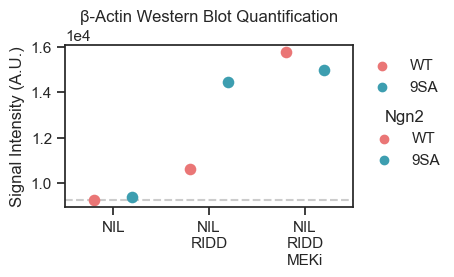

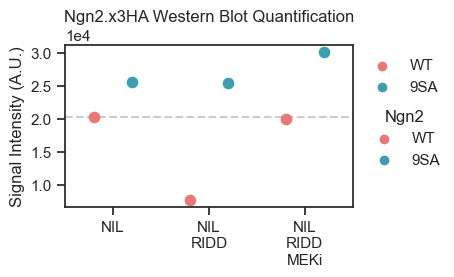

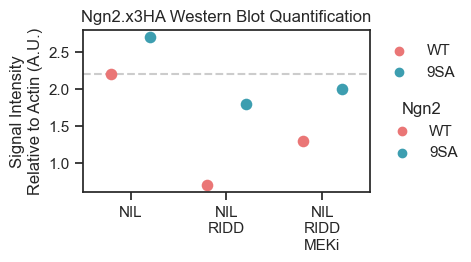

In [16]:

sns.set_theme(style="ticks",font_scale=1)

palette = {'WT':'#ea7676','9SA':'#3d9eb0'}

order = ['NIL\n \n ', 'NIL RIDD\n \n ', 'NIL RIDD\nMEKi\n ']
protein = ['β-Actin','Ngn2.x3HA']


for p in protein:
    savetitle = p + '_western'
    plottitle = p + ' Western Blot Quantification'
    hline = float(df.loc[(df.Ngn2 == 'WT') & (df['condition'] == 'NIL') & (df['phosphatase'] != "+p'ase") & (df.Protein==p)]['Signal Intensity (A.U.)'])
    custom_catplot('condition all','Signal Intensity (A.U.)',df[df['Protein']==p],savetitle,
                    plottitle=plottitle,
                    height=2.5,
                    width=3,
                    order=order,
                    hue = 'Ngn2',
                    hue_order = ['WT','9SA'],
                    palette=palette,
                    xlabel_rot=0,hlines=[hline])
    




p = 'Ngn2.x3HA'
plottitle = p + ' Western Blot Quantification'
slice = df[df['Protein']==p] 
slice = slice.rename(columns={'Signal Intensity Relative to Actin (A.U.)': 'Signal Intensity\nRelative to Actin (A.U.)'})
hline = float(slice.loc[(slice.Ngn2 == 'WT') & (slice['condition'] == 'NIL') & (slice['phosphatase'] != "+p'ase")]['Signal Intensity\nRelative to Actin (A.U.)'])
savetitle = p + '_' + savedict[y]
custom_catplot('condition all','Signal Intensity\nRelative to Actin (A.U.)',slice,savetitle,
                plottitle=plottitle,
                height=2.5,
                width=3,
                order=order,
                hue='Ngn2',
                hue_order=['WT','9SA'],
                palette=palette,
                xlabel_rot=0,hlines=[hline])